# Introduction

[Original Source Code](https://keras.io/examples/vision/mnist_convnet/)

# Setup

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


softmax:            0.2, 0.5, 0.1, 0.2
categorial (nhan):  0,   0,   1.0, 0
=>       CE loss =  -log(0.1)

# Prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
# num_features = 28**2
input_shape = (8*8,)

#KERAS: (N, H, W, C) = (batch-size, height, width, channels)

# the data, split between train and test sets
data,target = load_digits(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(data,target,random_state=100,train_size=.8)

# Scale images to the [0, 1] range
# x_train = x_train.astype("float32") / 255
# x_test = x_test.astype("float32") / 255

print(type(x_train), type(y_train))
print(x_train.shape, y_train.shape)

# Make sure input data: (N, num_features)
# x_train = x_train.reshape(-1, num_features)
# x_test = x_test.reshape(-1, num_features)
print("train samples: ", x_train.shape)
print("test samples: ", x_test.shape)


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape: ", y_train.shape)
print("y_train[:3, :]: ")
print(y_train[:3, :])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1437, 64) (1437,)
train samples:  (1437, 64)
test samples:  (360, 64)
y_train shape:  (1437, 10)
y_train[:3, :]: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
data,target = load_digits(return_X_y = True)
data.max()

16.0

# Build the model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(400, activation="relu"),
        layers.Dense(200, activation="relu"),
        layers.Dense(50, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

# save computational graph to json
graph = model.to_json()
with open("comp_graph.json", "w") as json_file:
    json_file.write(graph)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               26000     
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 50)                10050     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 116,760
Trainable params: 116,760
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [ ]:
batch_size = 128
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", 
                                                                          tf.keras.metrics.Precision(),
                                                                          tf.keras.metrics.Recall()])

log = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)
model.save_weights("model.h5")

Epoch 1/50
11/11 [==============================] - 3s 37ms/step - loss: 2.6527 - accuracy: 0.2715 - precision: 0.3636 - recall: 0.1268 - val_loss: 1.2614 - val_accuracy: 0.6944 - val_precision: 0.9643 - val_recall: 0.1875
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 1.2904 - accuracy: 0.5282 - precision: 0.7798 - recall: 0.3287 - val_loss: 0.6407 - val_accuracy: 0.8403 - val_precision: 0.9694 - val_recall: 0.6597
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.9934 - accuracy: 0.6388 - precision: 0.7942 - recall: 0.5313 - val_loss: 0.4642 - val_accuracy: 0.8889 - val_precision: 0.9741 - val_recall: 0.7847
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.7223 - accuracy: 0.7502 - precision: 0.8570 - recall: 0.6489 - val_loss: 0.3481 - val_accuracy: 0.8889 - val_precision: 0.9323 - val_recall: 0.8611
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 0.6020 - accuracy: 0.7811 - precision: 

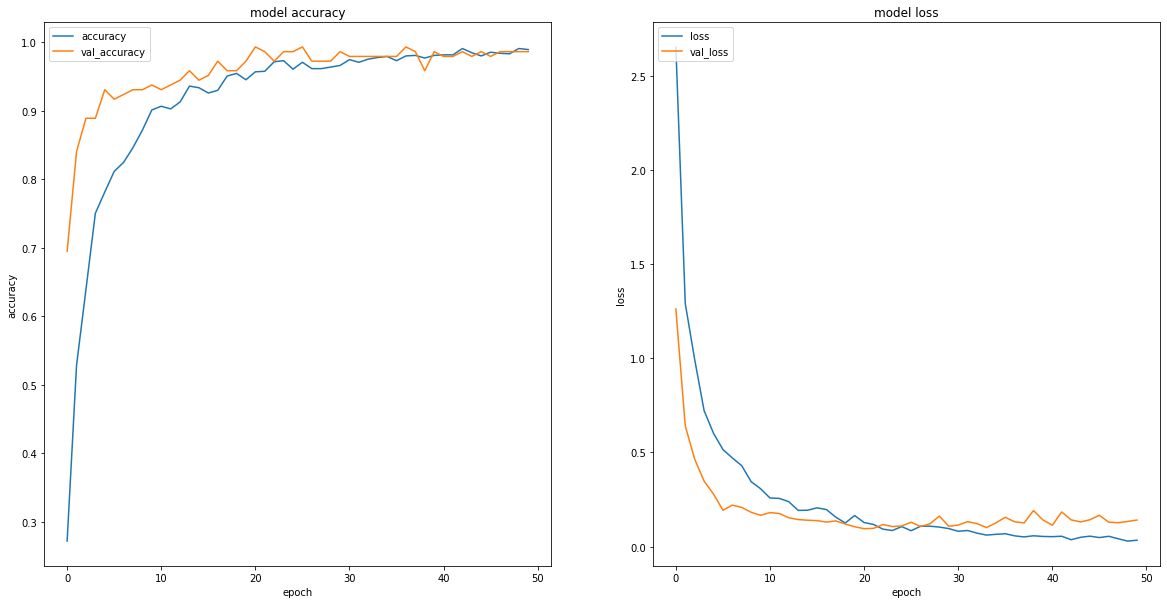

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy',], loc='upper left')

plt.subplot(1,2,2)
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()



In [ ]:
log.params

{'epochs': 50, 'steps': 11, 'verbose': 1}

In [ ]:
log.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

# Evaluate the trained model

In [ ]:
from keras.models import model_from_json

# load computational graph
json_file = open('comp_graph.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
pretrained_model = model_from_json(loaded_model_json)

# load weights into new model + compile
pretrained_model.load_weights("model.h5")
pretrained_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", 
                                                                          tf.keras.metrics.Precision(),
                                                                          tf.keras.metrics.Recall()])


score = pretrained_model.evaluate(x_test, y_test, verbose=1)
print("-"*120)
print("Loss: {:6.2f}, Precision: {:6.2f}%, Recall: {:6.2f}% ".format(score[0],score[1]*100, score[2]*100))
print("-"*120)


12/12 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.9722 - precision_1: 0.9749 - recall_1: 0.9722
------------------------------------------------------------------------------------------------------------------------
Loss:   0.09, Precision:  97.22%, Recall:  97.49% 
------------------------------------------------------------------------------------------------------------------------


In [ ]:
arr = np.array([1,2,3,5])

In [ ]:
arr2 = arr * 2

In [ ]:
print(arr)
print(arr2)

[1 2 3 5]
[ 2  4  6 10]


In [ ]:
arr3 = arr+ arr2

In [ ]:
arr3


array([ 3,  6,  9, 15])

In [ ]:
arr2.T

array([ 2,  4,  6, 10])

In [ ]:
np.matmul(arr,arr2)

78

In [ ]:
ones = np.ones(10)

In [ ]:
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
zeros = np.zeros(50)

In [ ]:
zeros

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
arr2.max()

10

In [ ]:
np.max(arr2)

10